In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Display settings
pd.set_option('display.max_colwidth', None)

In [31]:
# Load the dataset
data_path = "../data/raw/Scam_Not_scam.csv"  # Adjust the path if necessary
df = pd.read_csv(data_path)

# Display basic info and preview
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   about_me         200 non-null    object
 1   label            200 non-null    int64 
 2   contact details  200 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ KB


about_me  \
0                                                                                                                                                               AÔ∏áÔ∏ÜÔ∏àlÔ∏áÔ∏ÜÔ∏àlÔ∏áÔ∏ÜÔ∏à Ô∏áÔ∏ÜÔ∏àmÔ∏áÔ∏ÜÔ∏àyÔ∏áÔ∏ÜÔ∏à Ô∏áÔ∏ÜÔ∏àsÔ∏áÔ∏ÜÔ∏àeÔ∏áÔ∏ÜÔ∏àxÔ∏áÔ∏ÜÔ∏àyÔ∏áÔ∏ÜÔ∏à Ô∏áÔ∏ÜÔ∏àpÔ∏áÔ∏ÜÔ∏àhÔ∏áÔ∏ÜÔ∏àoÔ∏áÔ∏ÜÔ∏àtÔ∏áÔ∏ÜÔ∏àoÔ∏áÔ∏ÜÔ∏àsÔ∏áÔ∏ÜÔ∏à Ô∏áÔ∏ÜÔ∏àaÔ∏áÔ∏ÜÔ∏ànÔ∏áÔ∏ÜÔ∏àdÔ∏áÔ∏ÜÔ∏à Ô∏áÔ∏ÜÔ∏àvÔ∏áÔ∏ÜÔ∏àiÔ∏áÔ∏ÜÔ∏àdÔ∏áÔ∏ÜÔ∏àeÔ∏áÔ∏ÜÔ∏àoÔ∏áÔ∏ÜÔ∏àsÔ∏áÔ∏ÜÔ∏à Ô∏áÔ∏ÜÔ∏à   
1                                                                                                                      solo busco que me traten como una princesa y me vuelvan m√°s caprichosa de lo que soy, busco un papi bueno que me cumpla los caprichos üíã.rn mi Instagram lun4aa.22   
2                                            buenas tardes yo busco conocer personas yo quiero alguien que me entienda y queme allude en los econ√≥mico porque soy una persona muy pobre pero tampoco soy interesada no me gusta pedirle a nadie y tampoco Nome gusta mentirle Ami pareja   
3                                                                                                                                                                                                                                                                         Tex –±O78O—≤4„Çâ—á8   
4  soy madre soltera tengo un hijo de 13 a√±os, soy auxiliar de enfermer√≠a, hogare√±a, rom√°ntica, fiel, honesta, busco amistad sincera y transparente inicialmente me gustar√≠a encontrar una persona que me ayude econ√≥micamente y si nos entendemos, me gustar√≠a tener una relaci√≥n seria   

   label  contact details  
0      1                1  
1      1                1  
2      1                0  
3      1                1  
4      1                0

- 200 rows with 3 columns:
- `about_me`: Text descriptions provided by users.
- `label`: Indicates if the content is unacceptable (1 = unacceptable, 0 = acceptable).
- `contact details`: Indicates if contact details are present (1 = yes, 0 = no).


In [32]:
df.isnull().sum()

about_me           0
label              0
contact details    0
dtype: int64

There are no missing values in the dataset. This means the data is complete, and I don't need to impute or remove rows/columns due to null values.


label
0    104
1     96
Name: count, dtype: int64
contact details
0    152
1     48
Name: count, dtype: int64


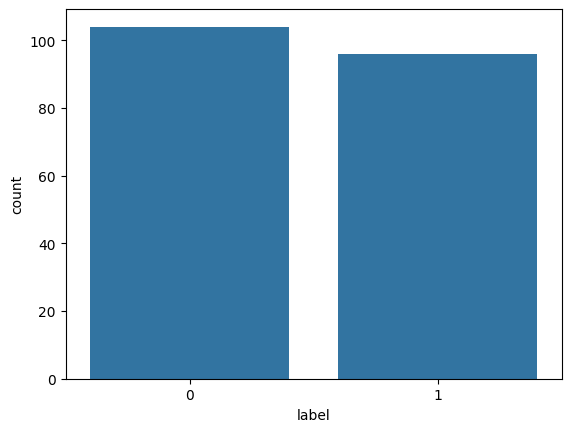

In [33]:
print(df['label'].value_counts())
print(df['contact details'].value_counts())
sns.countplot(data=df, x='label')
plt.show()

- `0`: 104 rows have acceptable content.
- `1`: 96 rows contain unacceptable content.
- Classes are balanced which is good for training a classification model as it reduces need for balancing techniques like oversampling or undersampling.

In [34]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

df['cleaned_about_me'] = df['about_me'].apply(clean_text)
df[['about_me', 'cleaned_about_me']].head()

about_me  \
0                                                                                                                                                               AÔ∏áÔ∏ÜÔ∏àlÔ∏áÔ∏ÜÔ∏àlÔ∏áÔ∏ÜÔ∏à Ô∏áÔ∏ÜÔ∏àmÔ∏áÔ∏ÜÔ∏àyÔ∏áÔ∏ÜÔ∏à Ô∏áÔ∏ÜÔ∏àsÔ∏áÔ∏ÜÔ∏àeÔ∏áÔ∏ÜÔ∏àxÔ∏áÔ∏ÜÔ∏àyÔ∏áÔ∏ÜÔ∏à Ô∏áÔ∏ÜÔ∏àpÔ∏áÔ∏ÜÔ∏àhÔ∏áÔ∏ÜÔ∏àoÔ∏áÔ∏ÜÔ∏àtÔ∏áÔ∏ÜÔ∏àoÔ∏áÔ∏ÜÔ∏àsÔ∏áÔ∏ÜÔ∏à Ô∏áÔ∏ÜÔ∏àaÔ∏áÔ∏ÜÔ∏ànÔ∏áÔ∏ÜÔ∏àdÔ∏áÔ∏ÜÔ∏à Ô∏áÔ∏ÜÔ∏àvÔ∏áÔ∏ÜÔ∏àiÔ∏áÔ∏ÜÔ∏àdÔ∏áÔ∏ÜÔ∏àeÔ∏áÔ∏ÜÔ∏àoÔ∏áÔ∏ÜÔ∏àsÔ∏áÔ∏ÜÔ∏à Ô∏áÔ∏ÜÔ∏à   
1                                                                                                                      solo busco que me traten como una princesa y me vuelvan m√°s caprichosa de lo que soy, busco un papi bueno que me cumpla los caprichos üíã.rn mi Instagram lun4aa.22   
2                                            buenas tardes yo busco conocer personas yo quiero alguien que me entienda y queme allude en los econ√≥mico porque soy una persona muy pobre pero tampoco soy interesada no me gusta pedirle a nadie y tampoco Nome gusta mentirle Ami pareja   
3                                                                                                                                                                                                                                                                         Tex –±O78O—≤4„Çâ—á8   
4  soy madre soltera tengo un hijo de 13 a√±os, soy auxiliar de enfermer√≠a, hogare√±a, rom√°ntica, fiel, honesta, busco amistad sincera y transparente inicialmente me gustar√≠a encontrar una persona que me ayude econ√≥micamente y si nos entendemos, me gustar√≠a tener una relaci√≥n seria   

                                                                                                                                                                                                                                                                 cleaned_about_me  
0                                                                                                                                                                                                                                                  all my sexy photos and videos   
1                                                                                                                   solo busco que me traten como una princesa y me vuelvan m√°s caprichosa de lo que soy busco un papi bueno que me cumpla los caprichos rn mi instagram lun4aa22  
2                                     buenas tardes yo busco conocer personas yo quiero alguien que me entienda y queme allude en los econ√≥mico porque soy una persona muy pobre pero tampoco soy interesada no me gusta pedirle a nadie y tampoco nome gusta mentirle ami pareja  
3                                                                                                                                                                                                                                                                  tex –±o78o—≥4„Çâ—á8  
4  soy madre soltera tengo un hijo de 13 a√±os soy auxiliar de enfermer√≠a hogare√±a rom√°ntica fiel honesta busco amistad sincera y transparente inicialmente me gustar√≠a encontrar una persona que me ayude econ√≥micamente y si nos entendemos me gustar√≠a tener una relaci√≥n seria

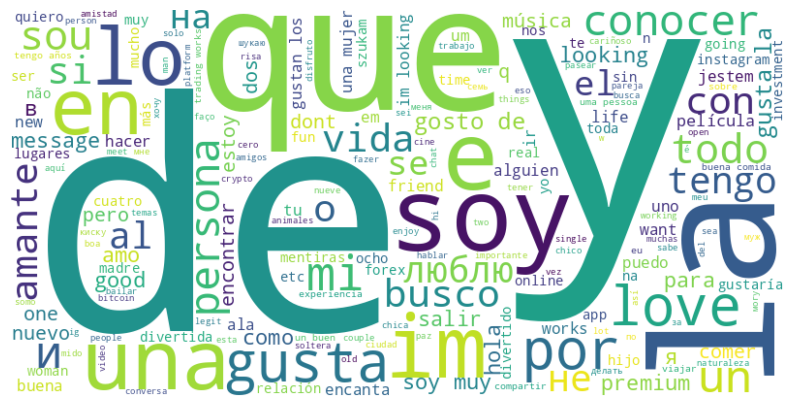

In [35]:
from wordcloud import WordCloud

text = " ".join(df['cleaned_about_me'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## –î–æ—Å–ª—ñ–¥–∂–µ–Ω–Ω—è –¥–∞—Ç–∞—Å–µ—Ç—É

–ü—Ä–∏–∫–ª–∞–¥–∏ —Ç–µ–∫—Å—Ç—ñ–≤ —É –¥–∞—Ç–∞—Å–µ—Ç—ñ
1. –ü—Ä–∏–π–Ω—è—Ç–Ω–∏–π –∫–æ–Ω—Ç–µ–Ω—Ç (`label = 0`):
    - –ü—Ä–∏–π–Ω—è—Ç–Ω—ñ —Ç–µ–∫—Å—Ç–∏ –∑–∞–∑–≤–∏—á–∞–π –æ–ø–∏—Å—É—é—Ç—å –æ—Å–æ–±–∏—Å—Ç—ñ —ñ–Ω—Ç–µ—Ä–µ—Å–∏ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏ —á–∏ –±–∞–∂–∞–Ω–Ω—è –±–µ–∑ –æ–±—Ä–∞–∑–ª–∏–≤–∏—Ö –≤–∏—Å–ª–æ–≤–ª—é–≤–∞–Ω—å –∞–±–æ —à–∞—Ö—Ä–∞–π—Å—å–∫–∏—Ö –º–æ—Ç–∏–≤—ñ–≤
2. –ù–µ–ø—Ä–∏–π–Ω—è—Ç–Ω–∏–π –∫–æ–Ω—Ç–µ–Ω—Ç ('label = 1'):
    - –¢–µ–∫—Å—Ç–∏ –∑ –æ–∑–Ω–∞–∫–∞–º–∏ —à–∞—Ö—Ä–∞–π—Å—Ç–≤–∞ –º–∞–Ω—ñ–ø—É–ª—è—Ü—ñ–π –∞–±–æ –Ω–µ—Ü–µ–Ω–∑—É—Ä–Ω–æ—ó –ª–µ–∫—Å–∏–∫–∏
    - –ß–∞—Å—Ç–æ –∑—É—Å—Ç—Ä—ñ—á–∞—é—Ç—å—Å—è –ø—Ä—è–º—ñ –∑–∞–ø–∏—Ç–∏ –Ω–∞ –≥—Ä–æ—à—ñ —á–∏ –æ–±—ñ—Ü—è–Ω–∫–∏ –Ω–µ–∑–¥—ñ–π—Å–Ω–µ–Ω–Ω–∏—Ö –≤–∏–≥–æ–¥
3. –ö–æ–Ω—Ç–∞–∫—Ç–Ω–∞ —ñ–Ω—Ñ–æ—Ä–º–∞—Ü—ñ—è (`contact details = 1`)
    - –¢–µ–∫—Å—Ç–∏, —â–æ –º—ñ—Å—Ç—è—Ç—å:
        - –ï–ª–µ–∫—Ç—Ä–æ–Ω–Ω—ñ –∞–¥—Ä–µ—Å–∏
        - –¢–µ–ª–µ—Ñ–æ–Ω–∏
        - –ü–æ—Å–∏–ª–∞–Ω–Ω—è –Ω–∞ —Å–æ—Ü–º–µ—Ä–µ–∂—ñ

### –í–∏—Å–Ω–æ–≤–∫–∏

- –ù–µ–ø—Ä–∏–π–Ω—è—Ç–Ω–∏–π –∫–æ–Ω—Ç–µ–Ω—Ç —á–∞—Å—Ç–æ –≤–∫–ª—é—á–∞—î —à–∞—Ö—Ä–∞–π—Å—å–∫—ñ –∑–∞–ø–∏—Ç–∏ –Ω–µ—Ü–µ–Ω–∑—É—Ä–Ω—É –ª–µ–∫—Å–∏–∫—É –∞–±–æ –æ—Å–æ–±–∏—Å—Ç—ñ –≤–∏–≥–æ–¥–∏
- –ö–æ–Ω—Ç–∞–∫—Ç–Ω–∞ —ñ–Ω—Ñ–æ—Ä–º–∞—Ü—ñ—è –ª–µ–≥–∫–æ –≤–∏–∑–Ω–∞—á–∞—î—Ç—å—Å—è –∑–∞ –¥–æ–ø–æ–º–æ–≥–æ—é —Ä–µ–≥—É–ª—è—Ä–Ω–∏—Ö –≤–∏—Ä–∞–∑—ñ–≤ (regex) –¥–ª—è email —Ç–µ–ª–µ—Ñ–æ–Ω—ñ–≤ —ñ —Å–æ—Ü–º–µ—Ä–µ–∂
- –ü—Ä–∏–π–Ω—è—Ç–Ω–∏–π –∫–æ–Ω—Ç–µ–Ω—Ç –∑–¥–µ–±—ñ–ª—å—à–æ–≥–æ –Ω–µ–π—Ç—Ä–∞–ª—å–Ω–∏–π –∞–±–æ –ø–æ–∑–∏—Ç–∏–≤–Ω–∏–π